In [1]:
import pandas as pd

df = pd.read_csv('MedicalData.csv') \
    .assign(Age=lambda d: d['Age'].apply(lambda v: {'adult': 'med', 'young adult': 'low', 'older adult': 'high'}[v])) \
    .assign(Edema=lambda d: d['Edema'].apply(lambda v: {0: 'no', 1: 'yes'}[v])) \
    [['Age', 'Edema', 'BP']]

df.shape

(155, 3)

In [2]:
df

,Age,Edema,BP
0,med,no,72
1,high,yes,66
2,med,yes,66
3,low,no,50
4,med,no,70
...,...,...,...
150,high,no,74
151,high,no,88
152,low,no,46
153,low,no,62


In [3]:
df.groupby(['Age', 'Edema']).mean()

BP
Age  Edema           
high no     72.681818
     yes    71.200000
low  no     65.142857
     yes    50.000000
med  no     73.106383
     yes    66.400000

<Axes: xlabel='Age', ylabel='BP'>

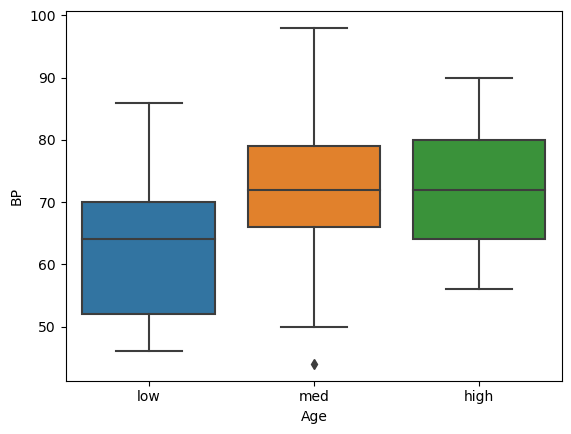

In [4]:
import seaborn as sns

sns.boxplot(df, x='Age', y='BP', order=['low', 'med', 'high'])

<Axes: xlabel='Edema', ylabel='BP'>

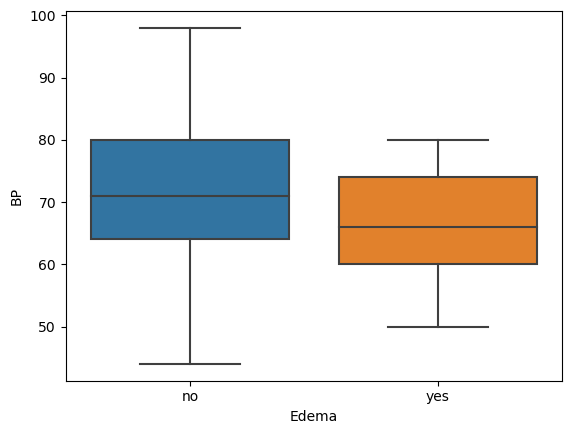

In [5]:
sns.boxplot(df, x='Edema', y='BP')

<Axes: xlabel='Age', ylabel='BP'>

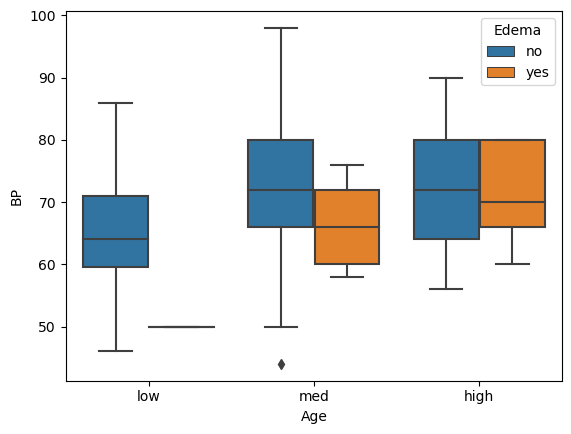

In [6]:
sns.boxplot(df, x='Age', y='BP', hue='Edema', order=['low', 'med', 'high'])

In [7]:
from scipy import stats

stats.f_oneway(*[df[df['Age']==g]['BP'] for g in df['Age'].unique()])

F_onewayResult(statistic=6.395106804747259, pvalue=0.0021543934246011725)

In [8]:
stats.f_oneway(*[df[df['Edema']==g]['BP'] for g in df['Edema'].unique()])

F_onewayResult(statistic=1.5445908581137533, pvalue=0.21583704352162397)

In [21]:
from patsy import dmatrices

formula = 'BP ~ C(Age) + C(Edema) + C(Age):C(Edema)'
y, X = dmatrices(formula, df, return_type='dataframe')

X = X.drop(columns=['Intercept'])

In [22]:
X

,C(Age)[T.low],C(Age)[T.med],C(Edema)[T.yes],C(Age)[T.low]:C(Edema)[T.yes],C(Age)[T.med]:C(Edema)[T.yes]
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
150,0.0,0.0,0.0,0.0,0.0
151,0.0,0.0,0.0,0.0,0.0
152,1.0,0.0,0.0,0.0,0.0
153,1.0,0.0,0.0,0.0,0.0


In [16]:
y

,BP
0,72.0
1,66.0
2,66.0
3,50.0
4,70.0
...,...
150,74.0
151,88.0
152,46.0
153,62.0


In [17]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(array([72.68181818]),
 array([[ -7.53896104,   0.4245648 ,  -1.48181818, -13.66103896,
          -5.2245648 ]]))

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('BP ~ C(Age) + C(Edema) + C(Age):C(Edema)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Age),1621.479431,2.0,6.773918,0.001529
C(Edema),281.579955,1.0,2.352666,0.127190
C(Age):C(Edema),162.285247,2.0,0.677965,0.509208
Residual,17833.137469,149.0,NaN,NaN
